In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [3]:
df_trainx = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/train.csv',header=None)
df_test = pd.read_csv("/kaggle/input/data-science-london-scikit-learn/test.csv",header=None)
df_trainy = pd.read_csv("/kaggle/input/data-science-london-scikit-learn/trainLabels.csv",header=None)

print(df_trainx.shape)
print(df_trainy.shape)
print(df_test.shape)

(1000, 40)
(1000, 1)
(9000, 40)


In [4]:
df_trainx.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [5]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [6]:
df_trainx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [7]:
df_trainx.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [8]:
print(df_trainy.shape)
df_trainy.head()

(1000, 1)


,0
0,1
1,0
2,0
3,1
4,0


In [9]:
df_trainy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [10]:
df_trainx.isnull().sum()[df_trainx.isnull().sum()>0]

Series([], dtype: int64)

In [11]:
df_trainy.isnull().sum()[df_trainy.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
df_trainy.columns=['label']
df_trainy.columns

Index(['label'], dtype='object')

In [13]:
df_test.isnull().sum()[df_trainx.isnull().sum()>0]

Series([], dtype: int64)

In [14]:
# check if any duplicate rows
df_trainx.duplicated().sum()

0

All features are numeric features. No null values are present.

### Analyzing the target variable

<AxesSubplot:xlabel='label', ylabel='count'>

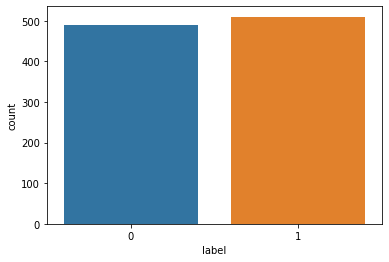

In [15]:
# draw a count plot

sns.countplot(data=df_trainy,x='label')

In [16]:
df_trainy.value_counts()

label
1        510
0        490
dtype: int64

There is no imbalance of data

### Correlation with other features

<AxesSubplot:>

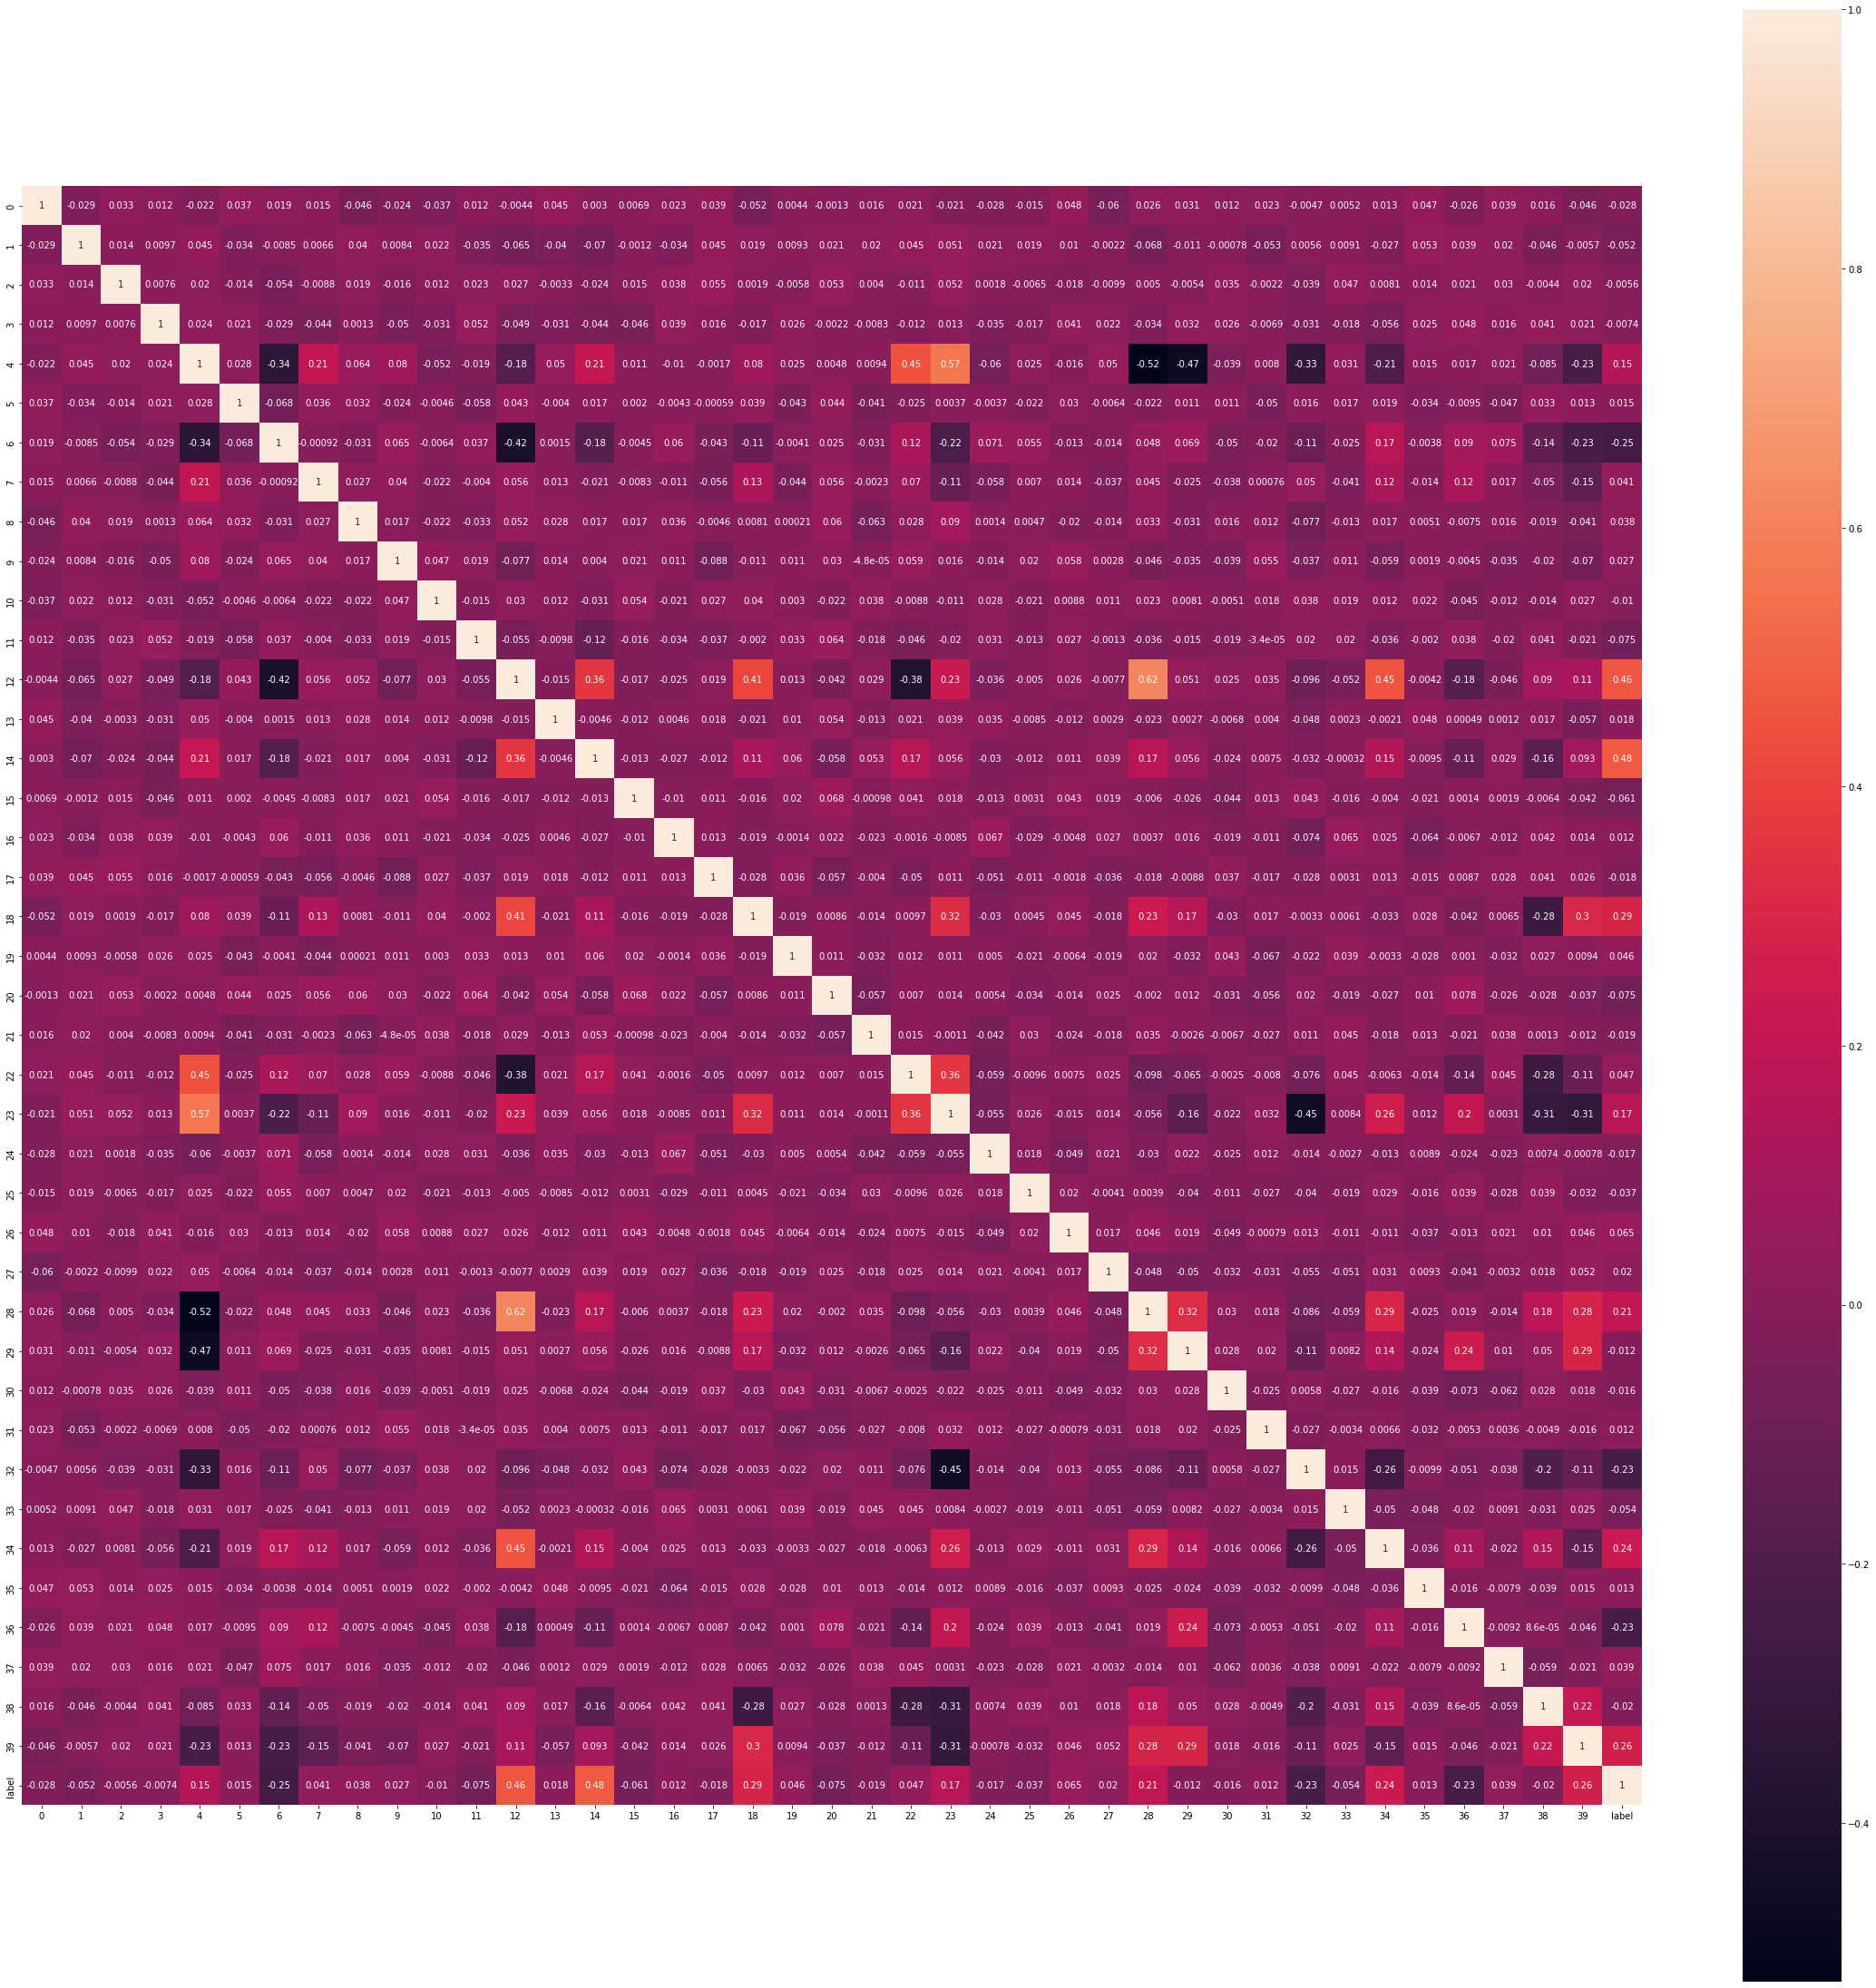

In [17]:
plt.figure(figsize=(40,40))
corr= pd.concat([df_trainx,df_trainy],axis='columns').corr()

sns.heatmap(corr,annot=True,square=True)

In [18]:
# check the top 20 correlations
abs(corr[corr !=1]).max().sort_values(ascending = False).head(20)


12       0.616709
28       0.616709
23       0.568959
4        0.568959
14       0.476171
label    0.476171
29       0.465130
34       0.453173
32       0.453138
22       0.449976
6        0.419642
18       0.412329
39       0.310490
38       0.306711
36       0.241248
7        0.206964
11       0.117767
8        0.090151
9        0.087833
17       0.087833
dtype: float64

In [19]:
corr.iloc[40].sort_values(ascending=False)

label    1.000000
14       0.476171
12       0.460738
18       0.289508
39       0.264656
34       0.236116
28       0.207949
23       0.172938
4        0.150652
26       0.064633
22       0.046953
19       0.046036
7        0.040523
37       0.039376
8        0.037534
9        0.026841
27       0.019778
13       0.018214
5        0.015151
35       0.012533
31       0.012458
16       0.012234
2       -0.005618
3       -0.007439
10      -0.010233
29      -0.012022
30      -0.015797
24      -0.017121
17      -0.018021
21      -0.018645
38      -0.019690
0       -0.028058
25      -0.036663
1       -0.052153
33      -0.053928
15      -0.060556
20      -0.075135
11      -0.075276
32      -0.227027
36      -0.231733
6       -0.252976
Name: label, dtype: float64

In [20]:
#selecting top correlated features for more analysis

# sel_num_features = corr.iloc[40][((corr.iloc[40]>0.02) | (corr.iloc[40] < -0.02)) & (corr.iloc[40] != 1)].index
sel_num_features = df_trainx.columns

print(len(sel_num_features))
print(sel_num_features)

40
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')


### Distribution of numerical features

In [21]:
#separating discrete and continuous numeric features

cont_features = [x for x in sel_num_features if len(df_trainx[x].unique() > 25)]

print(len(cont_features))
print(cont_features)


40
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


All numerical features are continuous

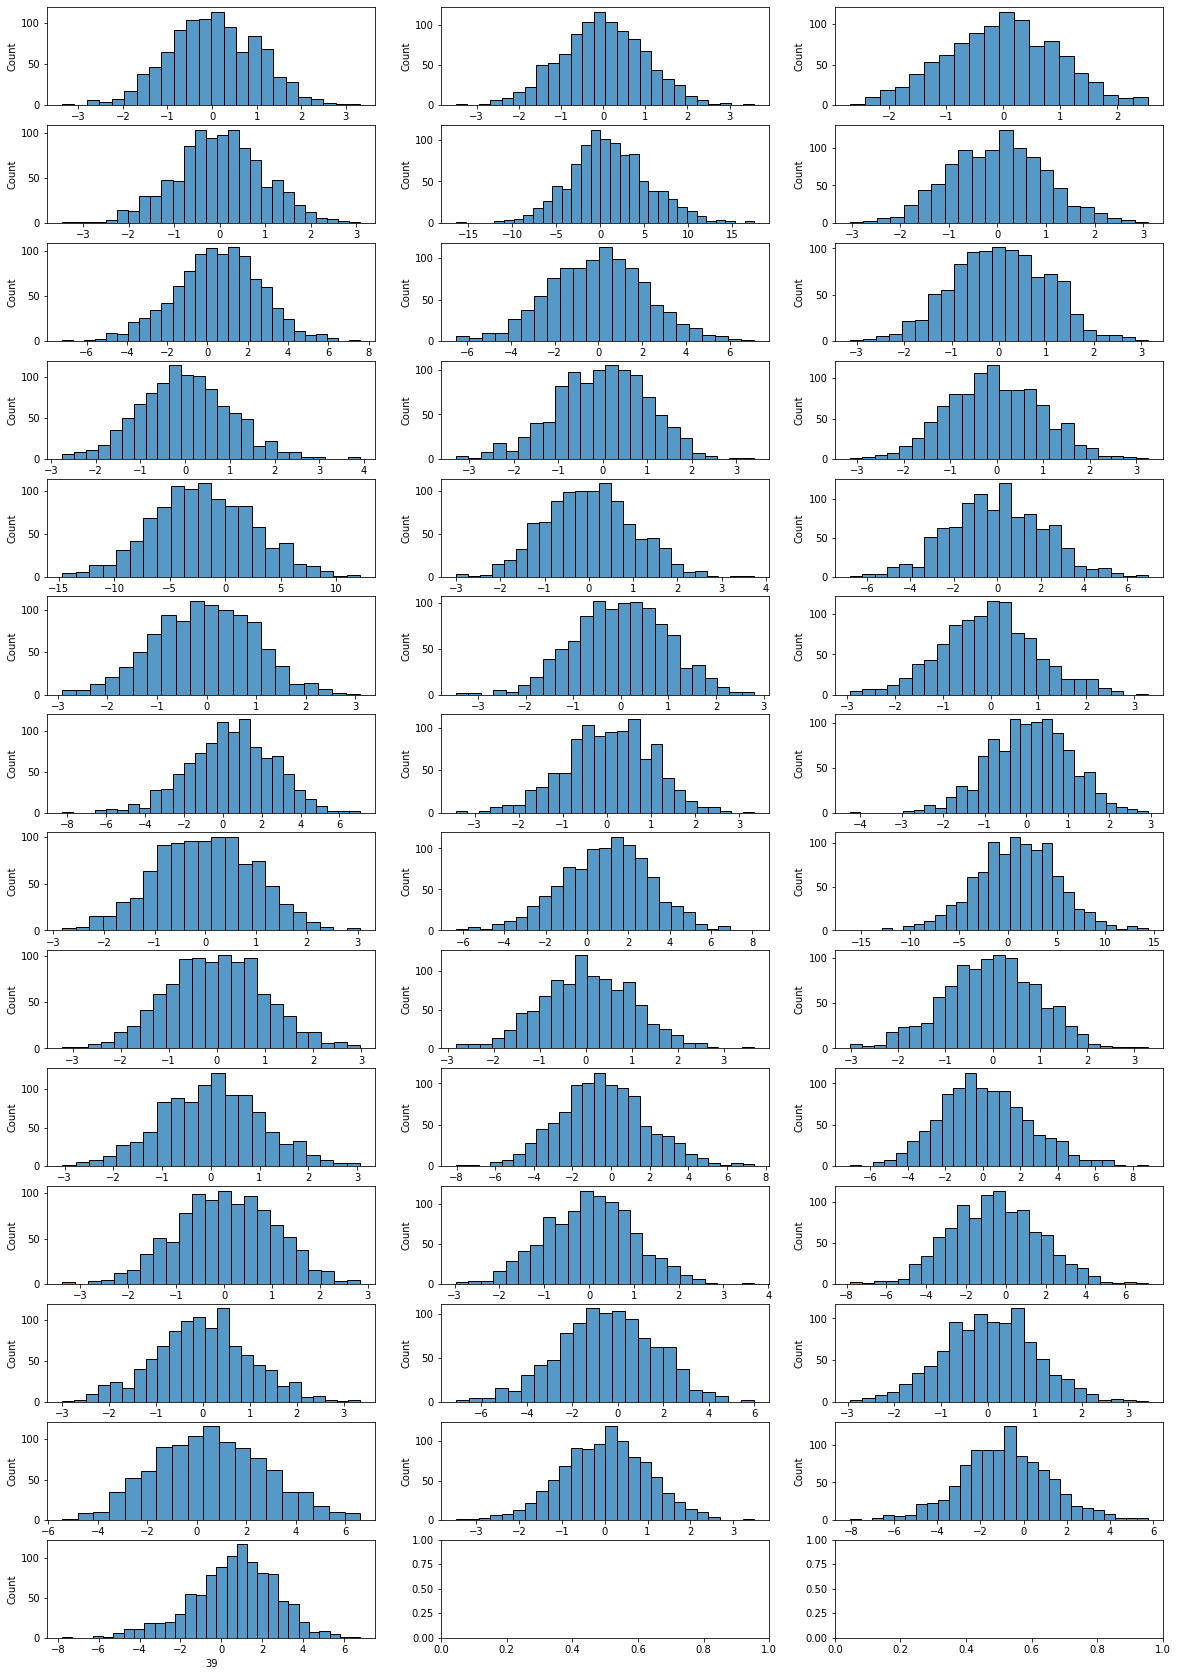

In [22]:
#draw historgrams to analyse the numerical variable distributions

fig,ax1 = plt.subplots(round(len(cont_features)/3+1),3,figsize=(20,30))


for i,ax in enumerate(fig.axes):
    if i < len(cont_features):
        sns.histplot(data=df_trainx,x=cont_features[i],ax=ax)
        
    

In [23]:
#check the skewness

df_trainx[cont_features].skew()

0    -0.007464
1     0.005842
2    -0.015666
3    -0.024957
4     0.233864
5     0.053246
6    -0.127727
7     0.004227
8    -0.032210
9     0.145751
10   -0.195532
11    0.072041
12    0.066800
13    0.120964
14    0.048827
15   -0.085982
16   -0.095756
17    0.058384
18   -0.229375
19   -0.192673
20   -0.160341
21   -0.004562
22   -0.160619
23   -0.112937
24    0.063792
25    0.067788
26   -0.116894
27    0.030901
28    0.218706
29    0.333917
30   -0.069430
31   -0.003730
32    0.066493
33    0.043958
34   -0.086218
35    0.034022
36    0.151978
37   -0.072011
38   -0.004666
39   -0.413463
dtype: float64

In [24]:
df_trainx[cont_features].kurtosis()

0    -0.066788
1     0.062100
2    -0.340718
3     0.032938
4     0.404082
5    -0.177650
6     0.070810
7    -0.036660
8    -0.242889
9     0.124849
10   -0.082883
11   -0.172338
12   -0.190921
13   -0.089430
14   -0.104814
15   -0.202379
16   -0.029803
17    0.072611
18    0.151649
19    0.050815
20    0.220424
21   -0.221443
22    0.166764
23    0.402609
24   -0.082035
25    0.058605
26   -0.032730
27   -0.069194
28    0.279106
29    0.151251
30   -0.225830
31   -0.077947
32   -0.041166
33    0.021868
34   -0.154845
35    0.051032
36   -0.355712
37   -0.010117
38    0.311593
39    0.406691
dtype: float64

Data is already normalized and there is no observable skewness

### Bivariate Analysis - Relationship of Target variable with the numeric features

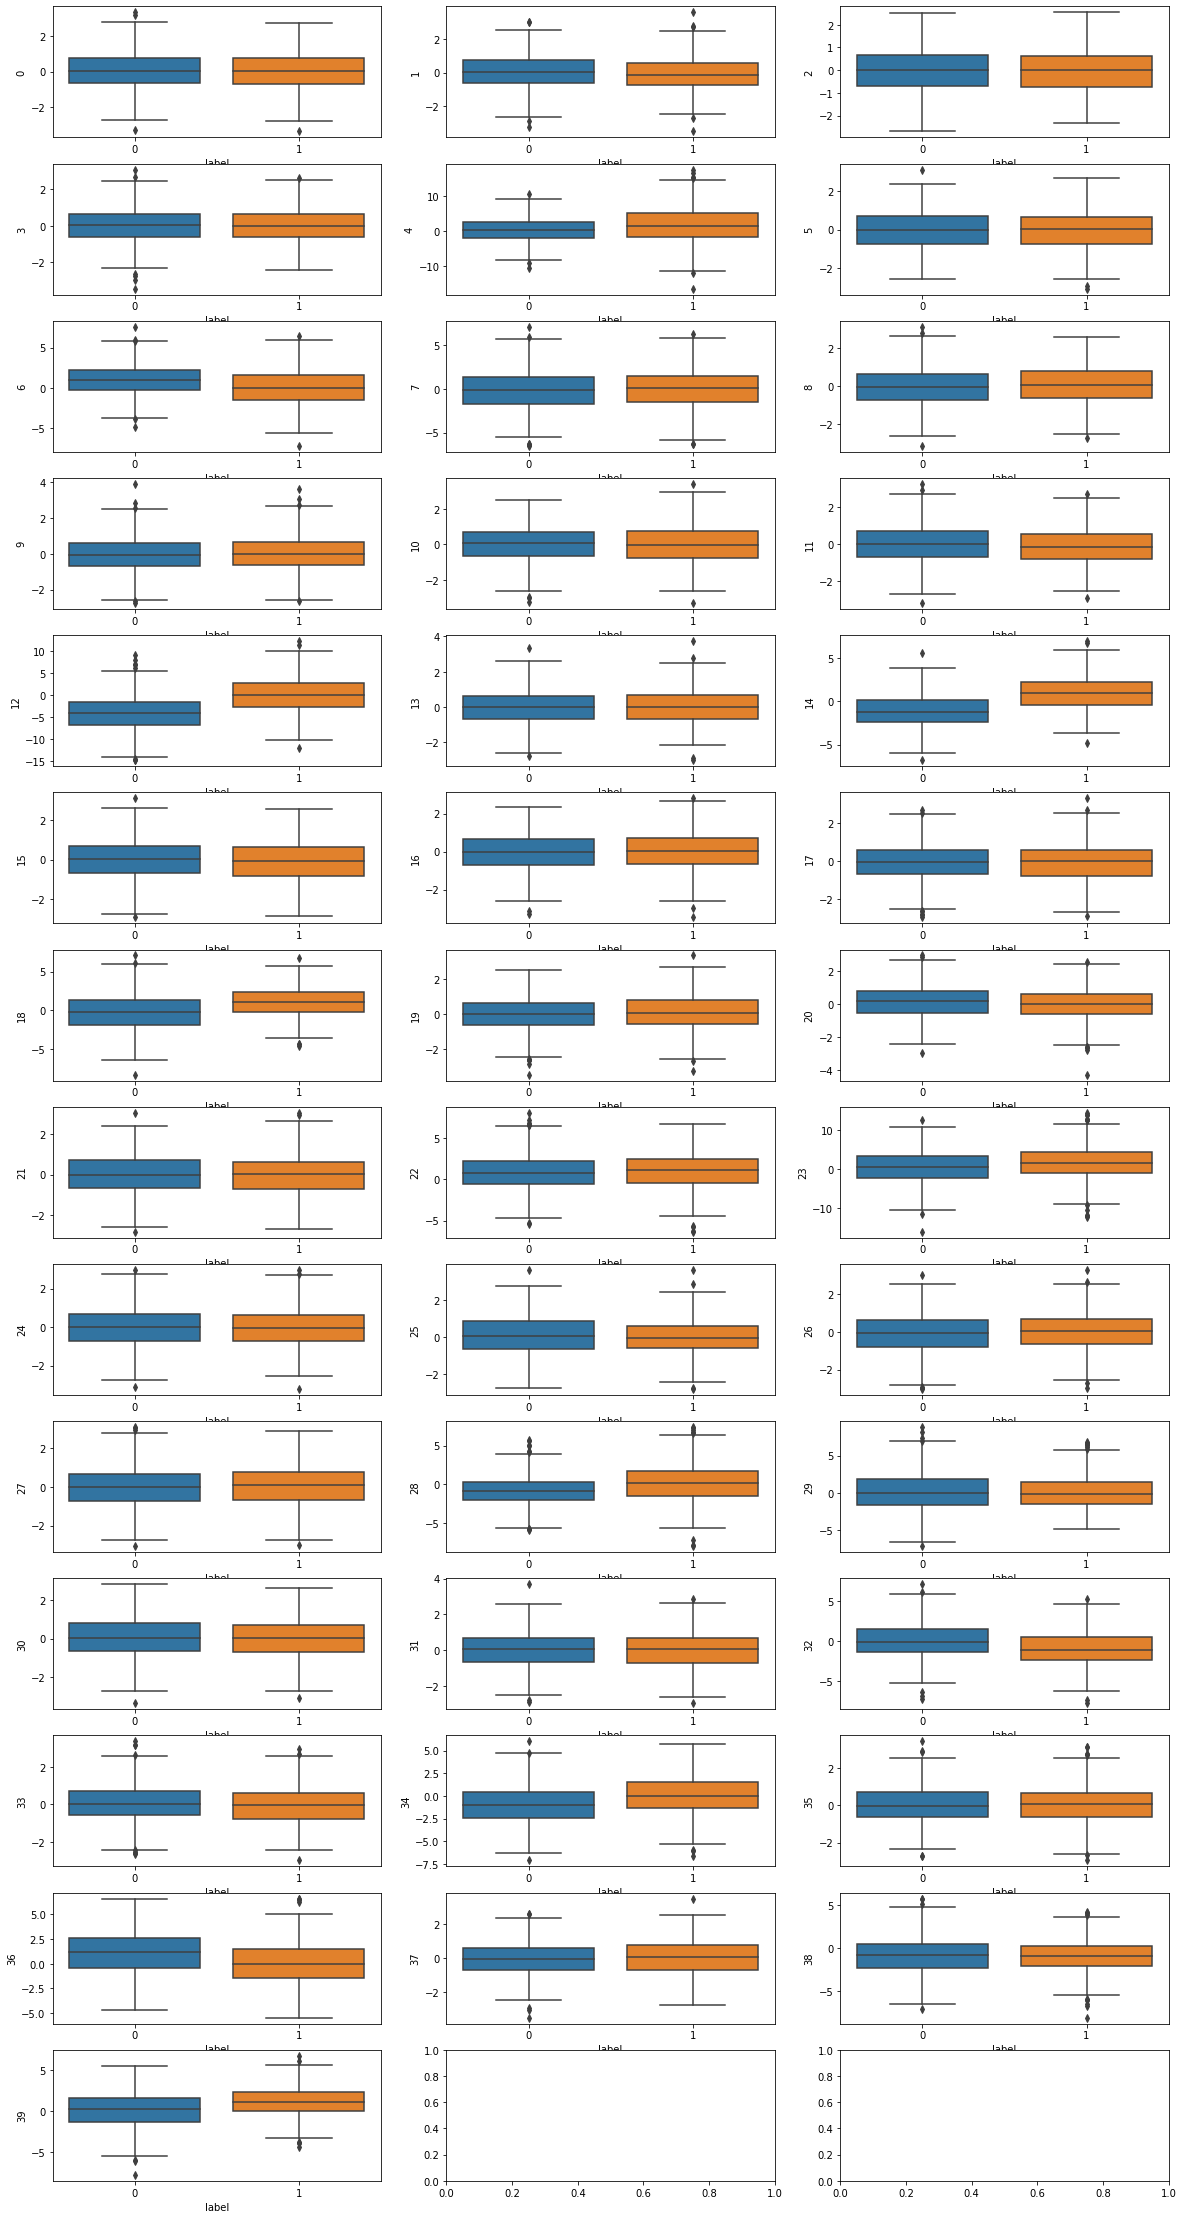

In [25]:
#Drawing boxplots for relationship with the target variable and the numeric continuous features

fig,ax1 = plt.subplots(round(len(cont_features)/3+1),3,figsize = (20,40))

df_temp =pd.concat([df_trainx,df_trainy],axis='columns')
for i,ax in enumerate(fig.axes):
    if i < len(cont_features):
        sns.boxplot(data=df_temp,y=cont_features[i],x='label',ax=ax)
        
        


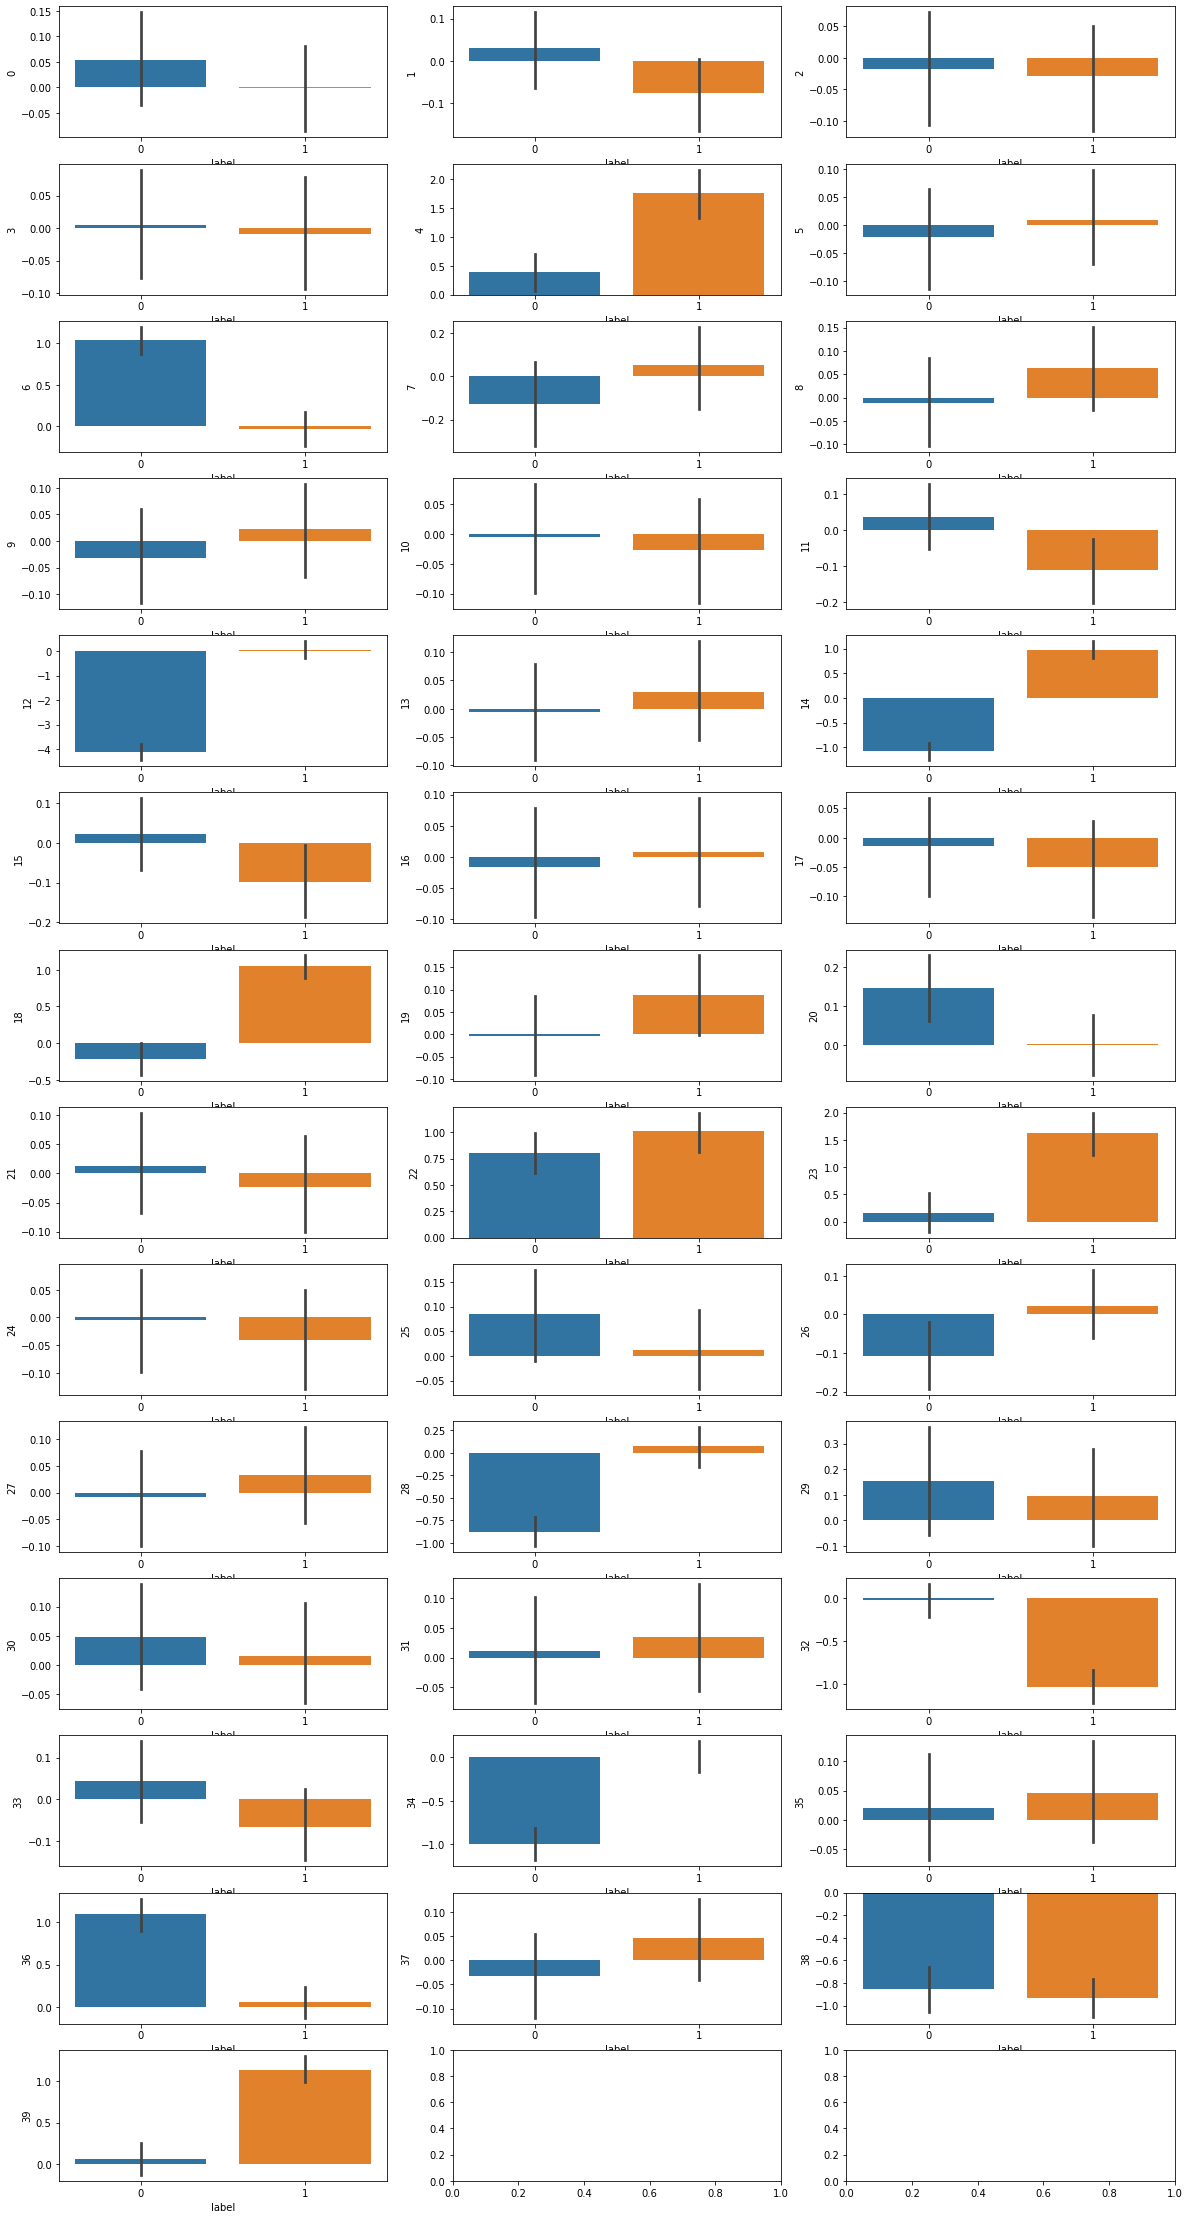

In [26]:
#draw barchart

fig,ax1 = plt.subplots(round(len(cont_features)/3+1),3,figsize = (20,40))

df_temp =pd.concat([df_trainx,df_trainy],axis='columns')
for i,ax in enumerate(fig.axes):
    if i < len(cont_features):
        sns.barplot(data=df_temp,y=cont_features[i],x='label',ax=ax)
        

### Modelling

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture

from sklearn.metrics import accuracy_score



In [28]:
train_x, test_x, train_y, test_y = train_test_split(df_trainx,df_trainy,test_size=2,random_state = 2)

In [29]:
model_list = {
    'LogisticRegression':{
        'model': LogisticRegression(),
        'parms': {
#             'fit_intercept':[True,False],
#             'penalty':['l2','l1','elasticnet']
        }      
    },
    'SGDClassifier':{
        'model': SGDClassifier(),
        'parms':{
        }
    },
    'DecisionTreeClassifier':{
        'model': DecisionTreeClassifier(),
        'parms':{
        }
    },
    'RandomForestClassifier':{
        'model': RandomForestClassifier(),
        'parms':{
            'n_estimators' : [10, 50, 100, 200,400],
            'max_depth' : [3, 10, 20, 40]
        }
    },
    'AdaBoostClassifier':{
        'model': AdaBoostClassifier(),
        'parms':{
        }
    },
    'GradientBoostingClassifier':{
        'model': GradientBoostingClassifier(),
        'parms':{
        }
    },
    'KNeighborsClassifier':{
        'model': KNeighborsClassifier(),
        'parms':{
            'n_neighbors' : [3,5,7,9]
        }
    },
    'GaussianNB':{
        'model': GaussianNB(),
        'parms':{
        }
    },
    'SVC':{
        'model': SVC(),
        'parms':{
            'kernel': ["linear", "poly", "rbf"],
            'C': [0.75,1,1.25]
        }
    },
#     'MLPClassifier':{
#         'model': MLPClassifier(),
#         'parms':{
#             'hidden_layer_sizes': [50, 100,150,200]
#         }
#     },
    'GaussianProcessClassifier':{
        'model': GaussianProcessClassifier(),
        'parms':{
        }
    },
#     'GaussianMixture':{
#         'model': GaussianMixture(),
#         'parms':{
#         }
#     },
}
    

In [30]:
cv=20
results = []

for model_name, model_det in model_list.items():
    print(model_det['model'])
    acc = np.mean(cross_val_score(model_det['model'],train_x,np.ravel(train_y),cv=5,scoring='accuracy'))
    results.append({'model':model_name,'accuracy':acc})
    

for r in results:
    print(r)

LogisticRegression()
SGDClassifier()
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
KNeighborsClassifier()
GaussianNB()
SVC()
GaussianProcessClassifier()
{'model': 'LogisticRegression', 'accuracy': 0.8075477386934672}
{'model': 'SGDClassifier', 'accuracy': 0.7474874371859297}
{'model': 'DecisionTreeClassifier', 'accuracy': 0.7444773869346734}
{'model': 'RandomForestClassifier', 'accuracy': 0.8586582914572863}
{'model': 'AdaBoostClassifier', 'accuracy': 0.798572864321608}
{'model': 'GradientBoostingClassifier', 'accuracy': 0.8546582914572864}
{'model': 'KNeighborsClassifier', 'accuracy': 0.8927939698492462}
{'model': 'GaussianNB', 'accuracy': 0.8085427135678392}
{'model': 'SVC', 'accuracy': 0.8927487437185929}
{'model': 'GaussianProcessClassifier', 'accuracy': 0.8827437185929649}


In [31]:
#trying out standardization

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

scaler = MinMaxScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_test_x = scaler.transform(test_x)

In [32]:
cv=20
results = []

for model_name, model_det in model_list.items():
    print(model_det['model'])
    acc = np.mean(cross_val_score(model_det['model'],scaled_train_x,np.ravel(train_y),cv=5,scoring='accuracy'))
    results.append({'model':model_name,'accuracy':acc})
    

for r in results:
    print(r)

LogisticRegression()
SGDClassifier()
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
KNeighborsClassifier()
GaussianNB()
SVC()
GaussianProcessClassifier()
{'model': 'LogisticRegression', 'accuracy': 0.8145628140703518}
{'model': 'SGDClassifier', 'accuracy': 0.7765527638190954}
{'model': 'DecisionTreeClassifier', 'accuracy': 0.7504974874371859}
{'model': 'RandomForestClassifier', 'accuracy': 0.8616582914572865}
{'model': 'AdaBoostClassifier', 'accuracy': 0.790532663316583}
{'model': 'GradientBoostingClassifier', 'accuracy': 0.8546582914572864}
{'model': 'KNeighborsClassifier', 'accuracy': 0.8095527638190955}
{'model': 'GaussianNB', 'accuracy': 0.8085427135678392}
{'model': 'SVC', 'accuracy': 0.8586633165829145}
{'model': 'GaussianProcessClassifier', 'accuracy': 0.8336281407035177}


In [33]:
#GridsearchCV

scores = []
g_cv = 20


for model_name, model_det in model_list.items():
    if model_det['parms']:
#  Do only if parms is present  
        clf = GridSearchCV(model_det['model'],model_det['parms'],cv=g_cv,return_train_score=False,scoring='accuracy',verbose=1)
        clf.fit(train_x,np.ravel(train_y))
    
        scores.append({'model':model_name,'best_score': clf.best_score_,'best_params':clf.best_params_})
        print(model_name , '*** ', clf.best_score_ , '***', clf.best_params_)
        
        m = clf.best_estimator_
        m.fit(train_x,np.ravel(train_y))
        print("Train score: ", m.score(train_x,np.ravel(train_y)), " Test Score:" , m.score(test_x,np.ravel(test_y)))
        
        print("Accuracy score:" , accuracy_score(np.ravel(test_y),m.predict(test_x)))
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df1)

Fitting 20 folds for each of 20 candidates, totalling 400 fits
RandomForestClassifier ***  0.8778163265306123 *** {'max_depth': 20, 'n_estimators': 400}
Train score:  1.0  Test Score: 1.0
Accuracy score: 1.0
Fitting 20 folds for each of 4 candidates, totalling 80 fits
KNeighborsClassifier ***  0.906877551020408 *** {'n_neighbors': 3}
Train score:  0.9569138276553106  Test Score: 1.0
Accuracy score: 1.0
Fitting 20 folds for each of 9 candidates, totalling 180 fits
SVC ***  0.9088775510204081 *** {'C': 1.25, 'kernel': 'rbf'}
Train score:  0.9569138276553106  Test Score: 1.0
Accuracy score: 1.0
                    model  best_score                             best_params
0  RandomForestClassifier    0.877816  {'max_depth': 20, 'n_estimators': 400}
1    KNeighborsClassifier    0.906878                      {'n_neighbors': 3}
2                     SVC    0.908878            {'C': 1.25, 'kernel': 'rbf'}


In [34]:
#GridsearchCV on scaled input

scores = []
g_cv = 20


for model_name, model_det in model_list.items():
    if model_det['parms']:
#  Do only if parms is present  
        clf = GridSearchCV(model_det['model'],model_det['parms'],cv=g_cv,return_train_score=False,scoring='accuracy',verbose=1)
        clf.fit(scaled_train_x,np.ravel(train_y))
    
        scores.append({'model':model_name,'best_score': clf.best_score_,'best_params':clf.best_params_})
        print(model_name , '*** ', clf.best_score_ , '***', clf.best_params_)
        
        m = clf.best_estimator_
        m.fit(scaled_train_x,np.ravel(train_y))
        print("Train score: ", m.score(scaled_train_x,np.ravel(train_y)), " Test Score:" , m.score(test_x,np.ravel(test_y)))
        
        print("Accuracy score:" , accuracy_score(np.ravel(test_y),m.predict(scaled_test_x)))
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df1)

Fitting 20 folds for each of 20 candidates, totalling 400 fits
RandomForestClassifier ***  0.8727755102040817 *** {'max_depth': 10, 'n_estimators': 400}
Train score:  1.0  Test Score: 0.5
Accuracy score: 1.0
Fitting 20 folds for each of 4 candidates, totalling 80 fits
KNeighborsClassifier ***  0.8395918367346938 *** {'n_neighbors': 9}
Train score:  0.8897795591182365  Test Score: 1.0
Accuracy score: 1.0
Fitting 20 folds for each of 9 candidates, totalling 180 fits
SVC ***  0.8717551020408163 *** {'C': 1.25, 'kernel': 'rbf'}
Train score:  0.9619238476953907  Test Score: 0.5
Accuracy score: 1.0
                    model  best_score                             best_params
0  RandomForestClassifier    0.872776  {'max_depth': 10, 'n_estimators': 400}
1    KNeighborsClassifier    0.839592                      {'n_neighbors': 9}
2                     SVC    0.871755            {'C': 1.25, 'kernel': 'rbf'}


Tried different scaling options. But the scaling did not seem to improve the performance.
KNeighborsClassifier and SVC has the best performance for orginal data. Former being a slightly better.

### Submission

In [35]:
# model = KNeighborsClassifier(n_neighbors = 3)
model = SVC(C= 1.25,kernel= 'rbf')

model.fit(train_x, np.ravel(train_y))
test_pred = model.predict(df_test)



In [36]:
submission = pd.DataFrame()

submission['Id'] = np.arange(1,df_test.shape[0]+1)
submission['Solution'] = test_pred

submission.head()

submission.to_csv('submission.csv',index=False)